# Fundamentals of Computer Science - PERCEPTUAL BISTABILITY

In [1]:
#Import all the required modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1
#### In this exercise we will explore a model of binocular rivalry presented by Laing and Chow (2002).While their paper included a spiking network model, we will concern ourselves only with their reduced population rate model.

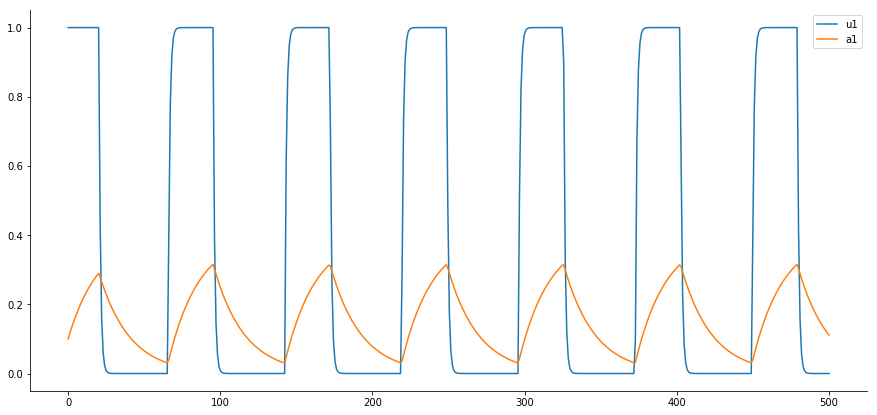

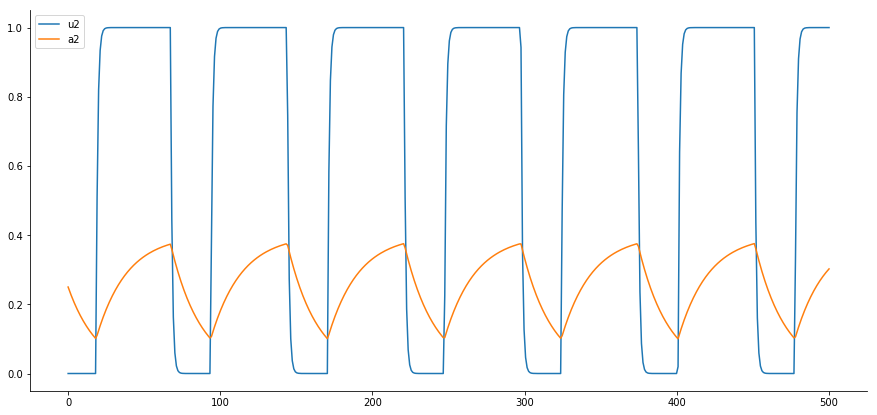

In [2]:
u1 = 1; 
a1 = 0.1; 
u2 = 0; 
a2 = 0.25; # initial values
t = np.linspace(0, 500, num=500) # time vector
x_0 = [u1, a1, u2, a2]; # initial conditions in a vector
I1 = 0.43;
I2 = 0.5;
I = (I1,I2) # Istimulus vector

def laing_chow(x0, t, I1, I2) :
    """This function takes as inputs the initial values, a time vector and 2 Istimulus arguments
    and evaluates the four ODE's of Laing Chow 2002. The return of this function is a list with
    the same number of elements as functions (4 in this case) with the evaluation of every function
    for the determined inputs.
    """
    
    alpha = 0.2; 
    beta = 0.4; 
    phi = 0.4; 
    tau = 20; 
    g1 = 1; 
    g2 = 1;
    u1, a1, u2, a2 = x0
    du1dt = - u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0)
    du2dt = - u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0)  
    da1dt = (1/tau)* (-a1 + phi*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,0))
    da2dt = (1/tau)* (-a2 + phi*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,0))
    y = [du1dt, da1dt, du2dt, da2dt]
    #It is very important to keep the order of the equations with the initial values for each one
    return y

sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol[:,0]; a1 = sol[:,1]; u2 = sol[:,2]; a2 = sol[:,3]

plt.figure(num=1,figsize=(15,7))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.legend()
sns.despine();
plt.figure(figsize=(15,7))
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()
sns.despine();

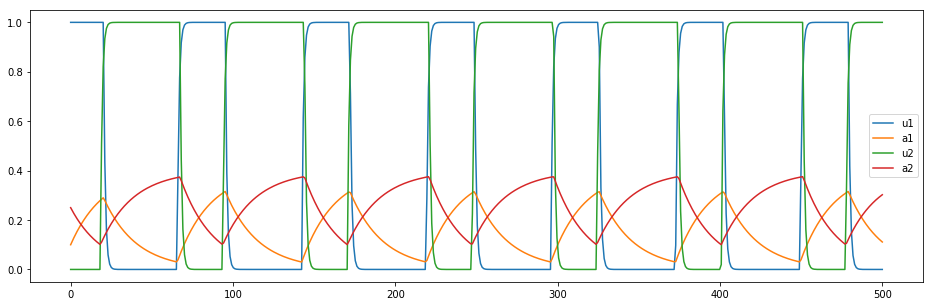

In [3]:
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

In [4]:
#Population active if u1 > u2
x1 = u1 > u2; #p1 is active when x1 = 1
x2 = u2 > u1; #p2 is active when x2 = 1
def dominance_durations(x1,x2,t) :
    #Calculate the time at which each population is active during each interval
    D=[];D2=[];D1=[];
    t1=t[0];
    t = t[:-2]
    for i,t_ in enumerate (t):
        if  (x1[i+1]^x1[i]) :
            t2 = t_;
            D.append(t2-t1);
            t1 = t2;       
            D1 = D[0:-1:2]; D2 =D[1:-1:2];
            if x1[0]== 0: #just to know which is each population 
                D1,D2=D2,D1;
    return D1,D2

D1,D2 = dominance_durations(x1,x2,t)
D1, D2


([20.040080160320638,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896,
  28.056112224448896],
 [47.09418837675349,
  48.09619238476954,
  49.09819639278555,
  49.09819639278558,
  48.09619238476955,
  49.09819639278555])

#### Why are the durations different from the analytical T1 (eq.9) in the paper?

In [5]:
#Anal. solution for T1
alpha = 0.2 ; beta = 0.4; phi = 0.4; tau = 20 ;
T1 = -tau*np.log((I2-beta)/(beta+phi-I1))
T2 = -tau*np.log((I1-beta)/(beta+phi-I2))
T2

print('They are similar but not exactly equal because we are solving the equations numerically so we have some error')
print(T1, T2)


They are similar but not exactly equal because we are solving the equations numerically so we have some error
26.16665639300358 46.051701859880936


#### The paper states that, if the inputs are larger than −alpha +beta +phi, both populations become active and oscillation will stop. Can you confirm this? 


 Using the previous values, alpha = 0.2, beta = 0.4 and phi = 0.4, the inputs should be higher than 0.6. 

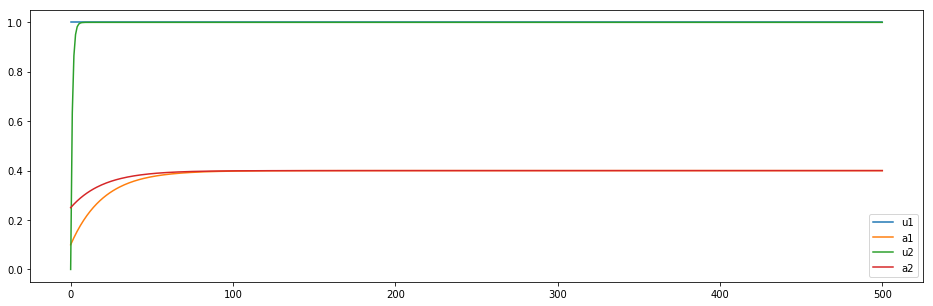

In [6]:
I1 = 0.64; I2 = 0.75; #Any value above 0.6 should work for this prove
I = (I1,I2)
sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol [:,0]; a1 = sol [:,1]; u2 = sol [:,2]; a2 = sol [:,3]
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend()

#### What about intermediate input values? Do the analytical dominance periods still fit the experimental results? How do you interpret these results?

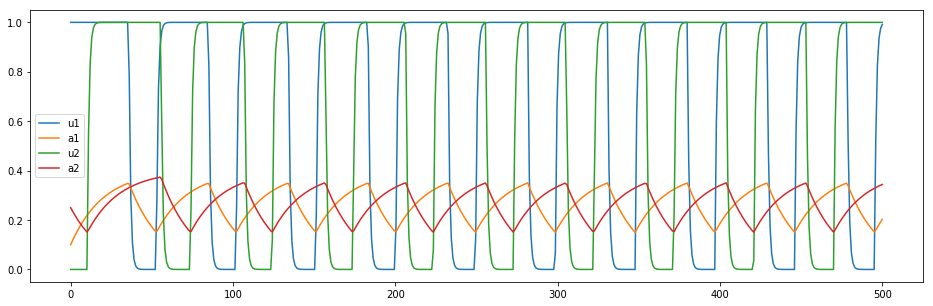

In [7]:
I1 = 0.55; I2 = 0.55; #Any value above 0.6 should work for this prove
I = (I1,I2)
sol = odeint(laing_chow, x_0, t, args=(I1,I2))
u1 = sol [:,0]; a1 = sol [:,1]; u2 = sol [:,2]; a2 = sol [:,3]
plt.figure(figsize=(16,5))
plt.plot(t,sol[:,0],label='u1')
plt.plot(t,sol[:,1],label='a1')
plt.plot(t,sol[:,2],label='u2')
plt.plot(t,sol[:,3],label='a2')
plt.legend();

If we use intermediate values too close to 0.6, although without reaching it, both populations oscillate but the time intervals are overlapped, i.e. there will be time points with both stimulus in 1 (both populations active) 

## Exercise 2
#### Next we will investigate a model of perceptual bistability developed by Moreno-Bote et al. (2007).The model is an attractor network that relies on noise to drive transitions between network states. Once again, while they also present a spiking network model, we will consider only their meanfield firing rate model.

#### 1. Why can’t you use scipy.integrate.odeint to implement the model in Moreno-Bote et al. (2007)?

    We cannot use odeint because in this case we don't have an ordinary differential equation but a stochastic 
    differential equation, i.e. it contais a random variable (f.e. white noise).

#### 2. Use Euler-Maruyama method - an extension of simple Euler method


In [8]:
#Implement Euler-Maruyama method.
def euler_maruyama_list(ffun, gfun, x0, t, **kwargs) :
    """ This function implements the Euler Maruyama method. It is basically implementing
    forward Euler on a system of differential equations in which we have an stochastic
    term (SDE).
    """
    
    dt = 0.1;
    u1 = [x0[0]];
    a1 = [x0[1]];
    u2 = [x0[2]];
    a2= [x0[3]];
    
    def dW(delta_t): 
        """Sample a random number at each call.
        """
        return np.random.normal(loc = 0.0, scale = np.sqrt(dt))
    
    for t_ in range(len(t)) :
        u1.append(u1[-1] + ffun(x0,t,kwargs['arg1'],kwargs['arg2'])[0]*dt + gfun(kwargs['tau'])*np.sqrt(dt)*dW(dt))
        a1.append(a1[-1] + ffun(x0,t,kwargs['arg1'],kwargs['arg2'])[1]*dt + gfun(kwargs['tau'])*np.sqrt(dt)*dW(dt))
        u2.append(u2[-1] + ffun(x0,t,kwargs['arg1'],kwargs['arg2'])[2]*dt + gfun(kwargs['tau'])*np.sqrt(dt)*dW(dt))
        a2.append(a2[-1] + ffun(x0,t,kwargs['arg1'],kwargs['arg2'])[3]*dt + gfun(kwargs['tau'])*np.sqrt(dt)*dW(dt))
        x0 = [u1[-1], a1[-1], u2[-1], a2[-1]]
        #IT WOULD MAKE MORE SENSE TO DO THIS AS VECTOR MULTIPLICATIONS AND NOT LIKE LIST OF LISTS
        #That way I would not need to use a for loop but everything would be reduced to multipl.
    return [u1,a1,u2,a2]

In [67]:
def euler_maruyama(ffun, gfun, x0, t, **kwargs) :
    """ This function implements the Euler Maruyama method. It is basically implementing
    forward Euler on a system of differential equations in which we have an stochastic
    term (SDE).
    """
    
    dt = t[1];
    x0 = np.array(x0); #convert the list of initial values into a numpy array
    sol = np.zeros((np.size(x0),np.size(t))); #create a 2-dim array for the solution.
    
    def dW(delta_t): 
        """Sample a random number at each call.
        """
        return np.random.normal(loc = 0.0, scale = np.sqrt(dt))
    
    w = np.array([dW(dt) for times in range(np.size(x0))]) #create an array of random dW of the same size as
    # it is the number of equations we will have.
    """ With this we are assuming that each equation of the system has its own different random component
    """

    for t_ in range(np.size(t)):
        sol[:,t_] = x0 + np.array(ffun(x0, t, **kwargs))*dt + np.array(gfun(x0,**kwargs))*np.sqrt(dt)*np.random.normal(size=x0.shape)
        x0 = sol[:,t_];
        #with this for loop I am filling the 2D-array with the forward euler appropriate values and stochastic term
    return sol

    

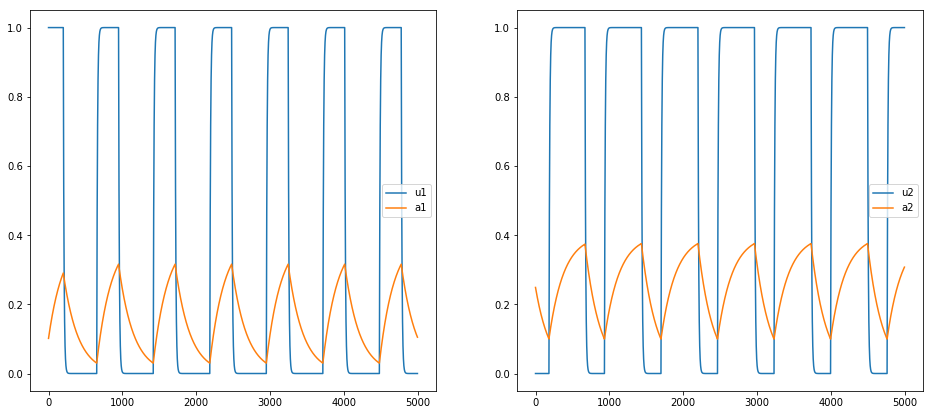

In [68]:
u1 = 1; 
a1 = 0.1; 
u2 = 0; 
a2 = 0.25; # initial values
t = np.arange(0,500,0.1)
x_0 = [u1, a1, u2, a2]; # initial conditions in a vector
I1 = 0.43;
I2 = 0.5;

""""Just use the same function as before by creating a gfun equal to zero, this way we would be avoiding the stochastic part of the
differential equation system and we shoud obtain the same solution as with odeint"""

gfun = lambda xO,**args: 0;

sol = euler_maruyama(laing_chow, gfun , x_0, t, I1=I1, I2=I2)
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(sol[0], label='u1')
plt.plot(sol[1], label='a1')
plt.legend()
plt.subplot(1,2,2)
plt.plot(sol[2], label='u2')
plt.plot(sol[3], label='a2')
plt.legend();

We can observe that we actually obtain the same result as before, because we are solving our system of equations without considering the stochastic part.

#### 3. Make ffun return 0 and gfun return 1/ $\tau$  . Simulate this stochastic differential equation between t = 0 and t = 5 with dt = 0.01 for $\tau$ = 0.1 and for $\tau$ = 1. 
#### Further, simulate the stochastic differential equation with gfun as before and ffunn=−x/$\tau$ . Compare the results of the three simulations. What is similar? What is different?

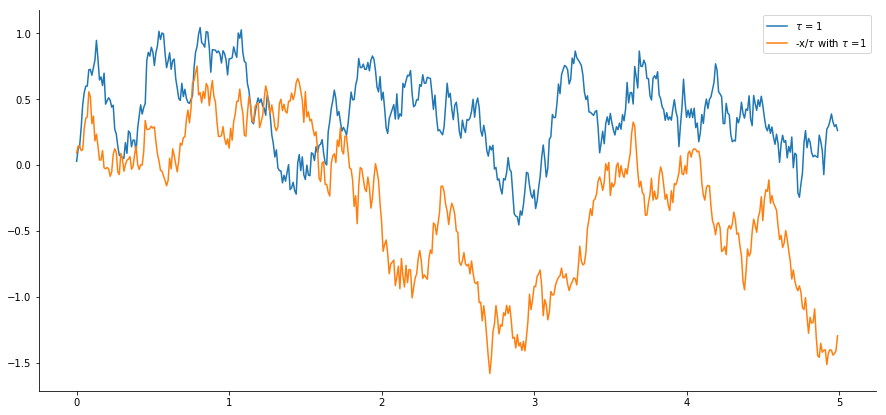

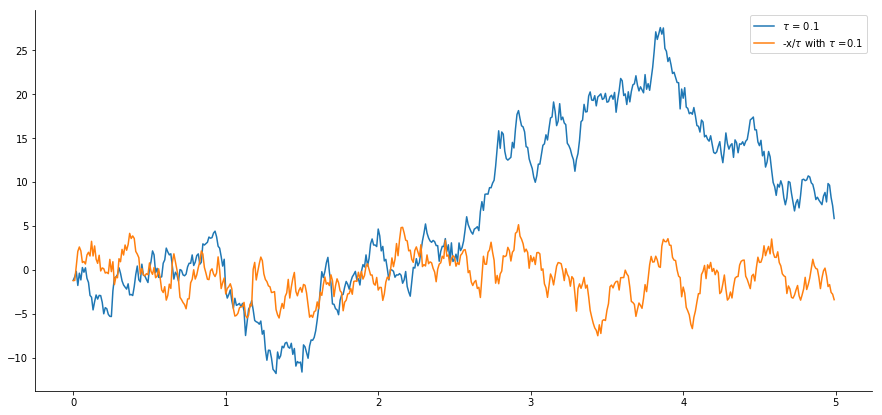

In [84]:
def ffun(x0, t, **args): return [0]
def gfun(x0, tau, **args): return (1/tau)

x_0 = [0]
t = np.arange(0,5,0.01)
taus = [0.1,1]

plt.figure(figsize=(15,7))

for n,tau_ in enumerate(taus ):
    sol = euler_maruyama(ffun, gfun , x_0, t, I1=I1, I2=I2, tau=tau_)

    plt.figure(n,figsize=(15,7))
    plt.plot(t,sol[0], label = "$\\tau$ = " + str(tau_))
    plt.legend();
    sns.despine();
    

def ffun(x, t, tau, **args): return (-x/tau);

for n,tau_ in enumerate(taus):
    sol = euler_maruyama(ffun, gfun , x_0, t, I1=I1, I2=I2, tau=tau_)

    plt.figure(n,figsize=(15,7))
    plt.plot(t,sol[0], label = "-x/$\\tau$ with $\\tau$ =" + str(tau_));
    plt.legend();


look upWiener processes
and Ornstein-Uhlenbeck processes. Your answer should incorporate these terms

#### Write two functions f_moreno_bote and g_moreno_bote which implement equations (A1,B5, B6, B7) of Moreno-Bote et al. (2007). (hint: note the stochastic part of the equations: only that goes into g moreno bote.)

In [12]:
# import warnings
# warnings.filterwarnings("error")

In [69]:
"Constants"
ga = 0.05;
gb = 0.05;
alpha = 0.75;
beta = 0.5;
gamma = 0.1;
phi = 0.5;
tau = 0.01;
tau_a = 2;
tau_b = 2;
tau_s = 0.1;
eta = 0.5;
theta = 0.1;
k = 0.05;
sigma = 0.03;




def f_moreno_bote(y, t, **kwargs) :
    
    na, nb, ra, rb, alpha_a, alpha_b = y
    
    r_pool = phi * (ra + rb) + ga + gb
    r_pool = r_pool if r_pool > 0 else 0    
    ra_inh = (r_pool + eta * ra)**2
    rb_inh = (r_pool + eta * rb)**2
    
#    try:
    
    dnadt_d = -na / tau_s
    dnbdt_d = -nb / tau_s
    dradt_d = (1 / tau) * (-ra + sigmoid(alpha * ra - beta * ra_inh + ga - alpha_a + na));
    drbdt_d = 1 / tau * (-rb + sigmoid(alpha * rb - beta * rb_inh + gb - alpha_b + nb))
    dalpha_adt = 1 / tau_a * (-alpha_a + gamma * ra)
    dalpha_bdt = 1 / tau_b * (-alpha_b + gamma * rb)
        
#    except RuntimeWarning:
 #       import pdb; pdb.set_trace()
    
    return [dnadt_d, dnbdt_d, dradt_d, drbdt_d, dalpha_adt, dalpha_bdt]
    
def g_moreno_bote(y, **kwargs) :
    
    dnadt_s = sigma * np.sqrt(2/tau_s)
    dnbdt_s = sigma * np.sqrt(2/tau_s)
    
    return [dnadt_s, dnbdt_s, 0, 0, 0, 0]

def sigmoid(x) :
    angle = 0.1;
    k = 0.05;
    return (1+ np.exp(-(x-theta)/k))**(-1) 

def ra_inh() :
    return (r_pool + n*ra)**2    

t = np.arange(0,20,0.01)


In [70]:
t = np.arange(0, 20, 0.01)

ra = 1;
rb = 0.01;
alpha_a = 0;
alpha_b = 0.04;
na = 0;
nb = 0;
x_0 = [na, nb, ra, rb, alpha_a, alpha_b]

sol = euler_maruyama(f_moreno_bote, g_moreno_bote , x_0, t)

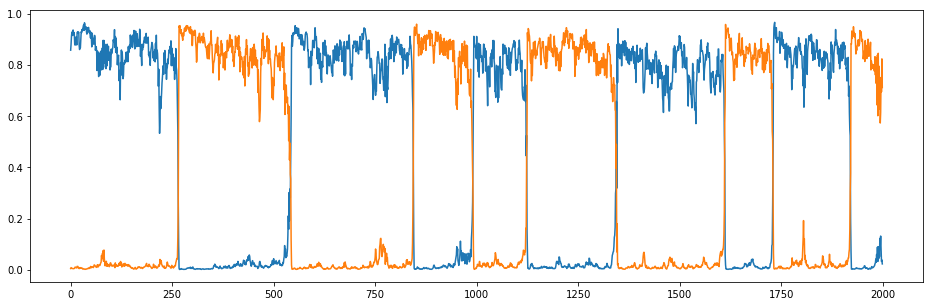

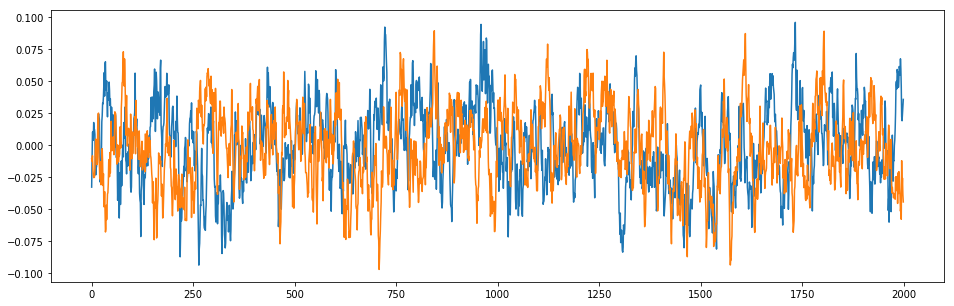

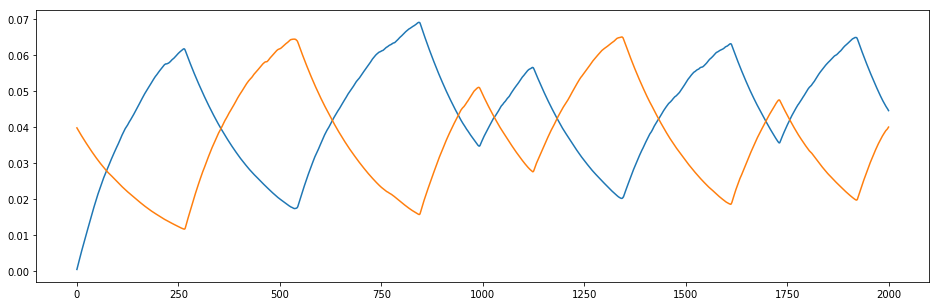

In [71]:
plt.figure(figsize = (16,5))
plt.plot(sol[2])
plt.plot(sol[3])

plt.figure(figsize = (16,5))
plt.plot(sol[0])
plt.plot(sol[1])

plt.figure(figsize = (16,5))
plt.plot(sol[4])
plt.plot(sol[5])

#### What is the influence of $\gamma$ in the model? How and why does the histogram change if you choose $\gamma$ = 0? Repeat your simulation with $\gamma$ = 0 and estimate the mean dominance duration.

#### Try to find a setting of parameters with $\gamma$ = 0 which has a mean dominance duration close (within 0.2 time units) to the first simulation from exercise 2.5. Show all three duration distributions in one histogram plot. How do they differ?